In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)

### 0. Define Data Path

In [ ]:
DATA_DIR = '/content/drive/My Drive/NEU/Graduate/CS_6140/Data/'
PREPROCESSED_DATA_F = 'preprocessed_data.csv'
PREPROCESSED_DATA_LOC = os.path.join(DATA_DIR, PREPROCESSED_DATA_F)

### 1. Load Preprocessed Data

In [ ]:
df = pd.read_csv(
    PREPROCESSED_DATA_LOC,
)
print(f"- {format(len(df), ',')} total rows in df.")
df.head(3)

- 876,100 total rows in df.


,datetime,machineID,volt,rotate,pressure,vibration,machineID_time_window,order_in_time_window,machine_example_ID,step_ID,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure,age,model2,model3,model4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,1,1,"(001, 001)","(001, 001, 001)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,1,2,"(001, 001)","(001, 001, 002)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,1,3,"(001, 001)","(001, 001, 003)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0


In [ ]:
# select columns of interest
df = df[
    [
        'datetime',
        'machine_example_ID', 'step_ID',
        'machineID', 'age',
        'model2', 'model3', 'model4',
        'machineID_time_window', 'order_in_time_window',
        'volt', 'rotate', 'pressure', 'vibration',
        'comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint',
        'error1', 'error2', 'error3', 'error4', 'error5',
        'comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure',
    ]
]

In [ ]:
# column typecasting
df['datetime'] = pd.to_datetime(df['datetime'])
df['machine_example_ID'] = df['machine_example_ID'].astype(str)
df['step_ID'] = df['step_ID'].astype(str)
df['machineID'] = df['machineID'].astype(int)

df['age'] = df['age'].astype(int)
df['model2'] = df['model2'].astype(int)
df['model3'] = df['model3'].astype(int)
df['model4'] = df['model4'].astype(int)
df['machineID_time_window'] = df['machineID_time_window'].astype(int)
df['order_in_time_window'] = df['order_in_time_window'].astype(int)
df['volt'] = df['volt'].astype(float)
df['rotate'] = df['rotate'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['vibration'] = df['vibration'].astype(float)
df['comp1_maint'] = df['comp1_maint'].astype(int)
df['comp2_maint'] = df['comp2_maint'].astype(int)
df['comp3_maint'] = df['comp3_maint'].astype(int)
df['comp4_maint'] = df['comp4_maint'].astype(int)
df['error1'] = df['error1'].astype(int)
df['error2'] = df['error2'].astype(int)
df['error3'] = df['error3'].astype(int)
df['error4'] = df['error4'].astype(int)
df['error5'] = df['error5'].astype(int)
df['comp1_failure'] = df['comp1_failure'].astype(int)
df['comp2_failure'] = df['comp2_failure'].astype(int)
df['comp3_failure'] = df['comp3_failure'].astype(int)
df['comp4_failure'] = df['comp4_failure'].astype(int)

In [ ]:
df.head(3)

,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure
0,2015-01-01 06:00:00,"(001, 001)","(001, 001, 001)",1,18,0,1,0,1,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 07:00:00,"(001, 001)","(001, 001, 002)",1,18,0,1,0,1,2,162.879223,402.747490,95.460525,43.413973,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 08:00:00,"(001, 001)","(001, 001, 003)",1,18,0,1,0,1,3,170.989902,527.349825,75.237905,34.178847,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Analyze Preprocessed Data

In [ ]:
df['any_failure'] = df[
    ['comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure']
].max(axis = 1)

df_failures = df[
    df['any_failure'] == 1
]
df_failures = pd.to_datetime(df_failures['datetime'])

datetime_series = df_failures#['any_failure']

# Get the day of the week for each datetime (Monday=0, Sunday=6)
datetime_series['weekday'] = datetime_series.dt.dayofweek

# Map the numeric day of the week to the actual day names
days_dict = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
datetime_series['weekday_name'] = datetime_series['weekday'].map(days_dict)

# Count the number of instances for each day of the week
instances_per_day = datetime_series['weekday_name'].value_counts()

print(instances_per_day)


datetime
Friday       117
Wednesday    114
Saturday     104
Monday       102
Tuesday       97
Thursday      95
Sunday        90
Name: count, dtype: int64


In [ ]:
df_failures = df[
    df['any_failure'] == 1
]

df_failures['datetime'].tolist()

[Timestamp('2015-01-05 06:00:00'),
 Timestamp('2015-03-06 06:00:00'),
 Timestamp('2015-04-20 06:00:00'),
 Timestamp('2015-06-19 06:00:00'),
 Timestamp('2015-09-02 06:00:00'),
 Timestamp('2015-10-17 06:00:00'),
 Timestamp('2015-12-16 06:00:00'),
 Timestamp('2015-03-19 06:00:00'),
 Timestamp('2015-04-18 06:00:00'),
 Timestamp('2015-12-29 06:00:00'),
 Timestamp('2015-01-07 06:00:00'),
 Timestamp('2015-02-06 06:00:00'),
 Timestamp('2015-07-21 06:00:00'),
 Timestamp('2015-10-04 06:00:00'),
 Timestamp('2015-12-03 06:00:00'),
 Timestamp('2015-01-17 06:00:00'),
 Timestamp('2015-02-16 06:00:00'),
 Timestamp('2015-04-02 06:00:00'),
 Timestamp('2015-07-16 06:00:00'),
 Timestamp('2015-08-30 06:00:00'),
 Timestamp('2015-10-14 06:00:00'),
 Timestamp('2015-01-09 06:00:00'),
 Timestamp('2015-02-23 06:00:00'),
 Timestamp('2015-04-09 06:00:00'),
 Timestamp('2015-06-23 06:00:00'),
 Timestamp('2015-09-06 06:00:00'),
 Timestamp('2015-10-06 06:00:00'),
 Timestamp('2015-11-20 06:00:00'),
 Timestamp('2015-01-

719
302


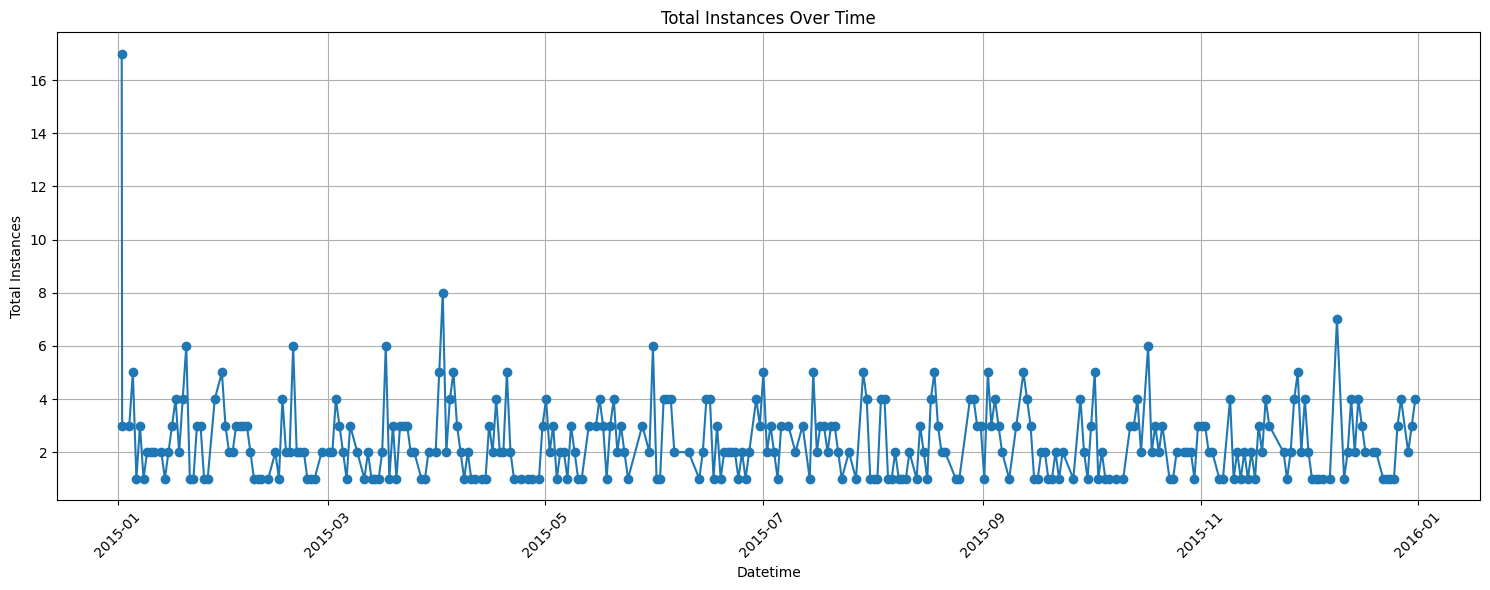

In [ ]:
df_failures = df[
    df['any_failure'] == 1
]

#for d in df['datetime'].tolist():

# group by 'datetime' and count the number of instances for each datetime
instances_per_datetime = df_failures.groupby(
    by = 'datetime'
).size()

print(len(df_failures))
print(len(instances_per_datetime))

# Plotting
plt.figure(
    figsize = (15, 6)
)
plt.plot(
    instances_per_datetime.index, instances_per_datetime.values,
    marker = 'o',
    linestyle = '-'
)
plt.title('Total Instances Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Instances')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Add 'any_failure' column
df['any_failure'] = df[['comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure']].max(axis=1)

# Drop all rows where 'any_failure' != 1
df_failures = df[df['any_failure'] == 1]

# Add a column for the hour of the week (0-167)
df_failures['hour_of_week'] = df_failures['datetime'].dt.dayofweek * 24 + df_failures['datetime'].dt.hour


<ipython-input-12-861803e57303>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failures['hour_of_week'] = df_failures['datetime'].dt.dayofweek * 24 + df_failures['datetime'].dt.hour


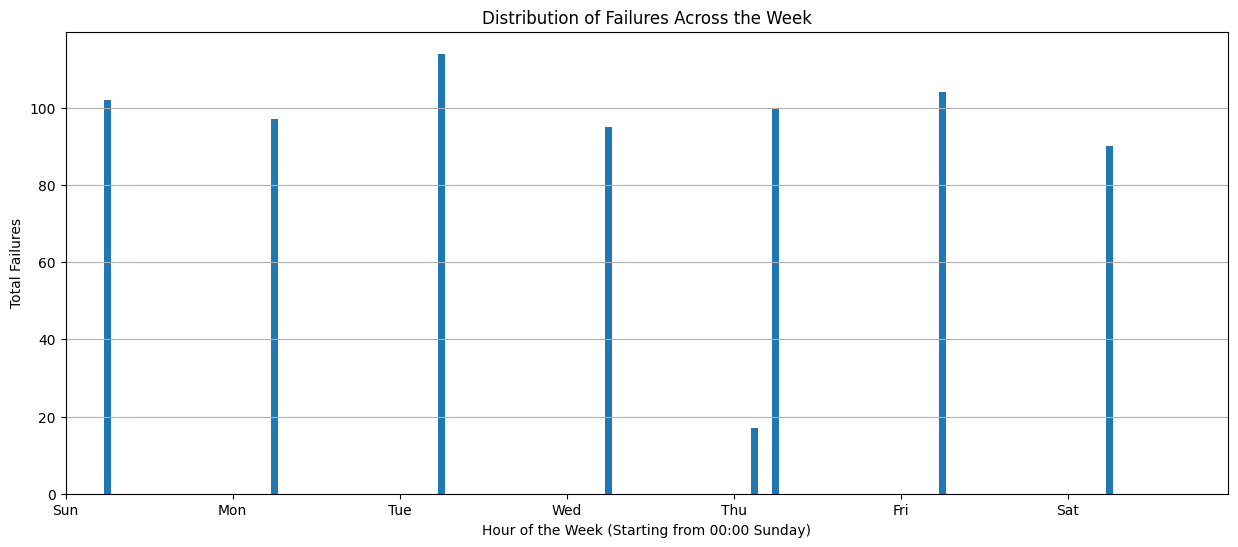

In [ ]:
# Group by the 'hour_of_week' and count the number of failures
failures_distribution = df_failures.groupby('hour_of_week').size()

# Make sure we have all hours of the week (0-167) even if some have no failures
all_hours = pd.Series(index=range(168), data=failures_distribution).fillna(0)

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(all_hours.index, all_hours.values, width=1.0)
plt.title('Distribution of Failures Across the Week')
plt.xlabel('Hour of the Week (Starting from 00:00 Sunday)')
plt.ylabel('Total Failures')
plt.xlim([0, 167])  # Set x-axis limits to show all hours of the week
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Mark each day of the week
plt.grid(axis='y')

plt.show()


### 3. Manual Analysis of `MachineID`==1

In [ ]:
sub_df = df[
    (df['machineID'] == 1)
    & (df['any_failure'] == 1)

]
print(f"- {format(len(sub_df), ',')} total rows in sub_df.")
print(f"- {format(len(sub_df['machineID_time_window'].unique()), ',')} total rows in unique machineID_time_window values (weeks).")

sub_df.head(10)

- 7 total rows in sub_df.
- 7 total rows in unique machineID_time_window values (weeks).


,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure,any_failure
96,2015-01-05 06:00:00,"(001, 001)","(001, 001, 097)",1,18,0,1,0,1,97,179.303153,499.777962,111.833028,52.383097,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1536,2015-03-06 06:00:00,"(001, 010)","(001, 010, 025)",1,18,0,1,0,10,25,198.257975,456.862342,89.333995,38.671900,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2616,2015-04-20 06:00:00,"(001, 016)","(001, 016, 097)",1,18,0,1,0,16,97,180.050801,346.362480,105.661164,39.218055,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4056,2015-06-19 06:00:00,"(001, 025)","(001, 025, 025)",1,18,0,1,0,25,25,187.673963,493.005160,105.334392,53.963961,1,0,0,0,0,0,0,0,0,0,0,0,1,1
5856,2015-09-02 06:00:00,"(001, 035)","(001, 035, 145)",1,18,0,1,0,35,145,144.094532,409.380150,106.720871,57.454990,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6936,2015-10-17 06:00:00,"(001, 042)","(001, 042, 049)",1,18,0,1,0,42,49,178.322428,383.715256,79.704008,43.213417,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8376,2015-12-16 06:00:00,"(001, 050)","(001, 050, 145)",1,18,0,1,0,50,145,137.701308,501.770653,108.557111,47.960218,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
fails_df = pd.DataFrame(df.groupby('machine_example_ID')['any_failure'].max())

print(len(fails_df[ fails_df['any_failure'] == 1]) / len(df))

0.0008183997260586691


In [ ]:
sub_df = df[
    (df['any_failure'] == 1)
    & (df['order_in_time_window'] < 24)

]
print(f"- {format(len(sub_df), ',')} total rows in sub_df.")
print(f"- {format(len(sub_df['machineID_time_window'].unique()), ',')} total rows in unique machineID_time_window values (weeks).")

sub_df.head(3)

- 112 total rows in sub_df.
- 41 total rows in unique machineID_time_window values (weeks).


,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure,any_failure
10609,2015-03-19 06:00:00,"(002, 012)","(002, 012, 001)",2,7,0,0,1,12,1,179.277874,322.388170,118.153934,47.415885,0,0,0,0,0,0,0,0,0,1,1,0,0,1
25586,2015-12-03 06:00:00,"(003, 049)","(003, 049, 001)",3,8,0,1,0,49,1,160.936268,368.843964,127.945450,42.324191,0,0,0,0,0,0,0,0,0,0,1,0,0,1
28467,2015-04-02 06:00:00,"(004, 014)","(004, 014, 001)",4,7,0,1,0,14,1,148.204347,247.946542,102.790544,41.158224,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
df[
    (df['machineID'] == 2)
    & (df['machineID_time_window'] == 11)
].head(5)

,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure,any_failure
10441,2015-03-12 06:00:00,"(002, 011)","(002, 011, 001)",2,7,0,0,1,11,1,153.276499,420.190118,87.673688,50.118149,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10442,2015-03-12 07:00:00,"(002, 011)","(002, 011, 002)",2,7,0,0,1,11,2,168.057873,394.012310,117.317907,39.787527,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10443,2015-03-12 08:00:00,"(002, 011)","(002, 011, 003)",2,7,0,0,1,11,3,175.071157,441.695063,107.054748,45.577930,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10444,2015-03-12 09:00:00,"(002, 011)","(002, 011, 004)",2,7,0,0,1,11,4,171.212926,387.026123,95.894193,37.451300,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10445,2015-03-12 10:00:00,"(002, 011)","(002, 011, 005)",2,7,0,0,1,11,5,167.203282,433.078533,111.034589,40.087155,0,0,0,0,0,0,0,0,0,0,0,0,0,0
